# Machine Learning

## Approach

The machine learning for this Capstone project is comprised of regression analysis and Naive Bayes classification. The regression analysis of both multivariate and forest types will determine demographic factors affecting the questionnaire score. Naive Bayes classification will determine the probability of ASD diagnosis depending on demographics. 

In [805]:
# Import Data
%store -r autism_data
autism_data.head()

,A1 Score,A2 Score,A3 Score,A4 Score,A5 Score,A6 Score,A7 Score,A8 Score,A9 Score,A10 Score,Age,Gender,Ethnicity,Jaundice,Autism in Family,Country of Residence,Used App Before,Result,Age Description,Relation to Patient,ASD,Ethnicity code,Gender code,Gender Cleaned,code
0,1,1,1,1,0,0,1,1,0,0,26,F,White-European,no,no,United States,no,6,18 and more,Self,NO,1,1,1,9
1,1,1,0,1,0,0,0,1,0,1,24,M,Hispanic/Latino,no,yes,Brazil,no,5,18 and more,Self,NO,2,2,0,2
2,1,1,0,1,1,0,1,1,1,1,27,M,Hispanic/Latino,yes,yes,Spain,no,8,18 and more,Parent,YES,2,2,0,2
3,1,1,0,1,0,0,1,1,0,1,35,F,White-European,no,yes,United States,no,6,18 and more,Self,NO,1,1,1,9
4,1,0,0,0,0,0,0,1,0,0,40,F,Not Available,no,no,Egypt,no,2,18 and more,Not Available,NO,3,1,1,4


## Regression Analysis of Score

### Multi-Variate

The machine learning process of the data is comprised of linear regression and R2 analysis. Linear regression offers many advantages like the flexibility in working with smaller datasets, the ability to provide a fitted regression line showing relationship between independent and dependent variables, and the expediency of providing results. This linear regression is used to test whether the independent variables, which are the gender and ethnicity, show correlation with the ASD score. The linear regression module could then be used to generate a linear equation with the box office parameters as variables.

After performing linear regression, R2 analysis was used in determining how closely the predicted data points adhere to the fitted regression. The independent and dependent variables are each split into training and testing portions with the training portions becoming fitted to a regressor. The regressor in turn is used for predicting the output dependent variable based test portion of the independent variable. These values are then used for computing R2 score and Residual Mean Square Error (RMSE); an R2 value closer to 1 would indicate close adherence to the fitted regression while a low RMSE score indicates that there is little deviation. R2 means error (RSME) of relatively low value would suggest that the predicted data reliably adheres to the fitted regression pattern.

In [510]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import seaborn as sns
import scipy as sp
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression

In [293]:
autism_data.groupby(by=['Gender','ASD'])['ASD'].count()

Gender  ASD
F       NO     234
        YES    103
M       NO     281
        YES     86
Name: ASD, dtype: int64

In [324]:
autism_data.groupby(by=['ASD'])['ASD'].count()

ASD
NO     515
YES    189
Name: ASD, dtype: int64

In [874]:
print(list(reg_df.columns.values))

['A1 Score', 'A2 Score', 'A3 Score', 'A4 Score', 'A5 Score', 'A6 Score', 'A7 Score', 'A8 Score', 'A9 Score', 'A10 Score', 'Result', 'Ethnicity code', 'Gender code', 'Gender Cleaned', 'code', 'Age_17', 'Age_18', 'Age_19', 'Age_20', 'Age_21', 'Age_22', 'Age_23', 'Age_24', 'Age_25', 'Age_26', 'Age_27', 'Age_28', 'Age_29', 'Age_30', 'Age_31', 'Age_32', 'Age_33', 'Age_34', 'Age_35', 'Age_36', 'Age_37', 'Age_38', 'Age_383', 'Age_39', 'Age_40', 'Age_41', 'Age_42', 'Age_43', 'Age_44', 'Age_45', 'Age_46', 'Age_47', 'Age_48', 'Age_49', 'Age_50', 'Age_51', 'Age_52', 'Age_53', 'Age_54', 'Age_55', 'Age_56', 'Age_58', 'Age_59', 'Age_60', 'Age_61', 'Age_64', 'Age_Not Available', 'Gender_F', 'Gender_M', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Hispanic/Latino', 'Ethnicity_Middle Eastern ', 'Ethnicity_Not Available', 'Ethnicity_Oceania', 'Ethnicity_Other', 'Ethnicity_South Asian', 'Ethnicity_Turkish', 'Ethnicity_White-European', 'Jaundice_no', 'Jaundice_yes', 'Autism in Family_no', 'Autism in F

In [904]:
# Linear Regression
reg_df = pd.get_dummies(autism_data)
x = reg_df[['Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Hispanic/Latino',
                 'Ethnicity_Middle Eastern ', 'Ethnicity_Not Available', 'Ethnicity_Oceania', 
                 'Ethnicity_Other', 'Ethnicity_South Asian', 'Ethnicity_Turkish', 
                 'Ethnicity_White-European','Gender_F', 'Gender_M','ASD_YES','ASD_NO']]
y = reg_df['Result']
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
reg.fit(X_train,y_train)
print("Intercept: {}".format(reg.intercept_))
print("Coefficients: {}".format(reg.coef_))
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("R^2 Value: {}".format(reg.score(X_test, y_test)))
print("Root Mean Squared Error: {}".format(rmse))


Intercept: 5.819554403213065
Coefficients: [-0.12348167  0.05134414  0.32710824  0.08378407 -0.37542678 -0.42724956
  0.32835072 -0.23953371  0.01964361  0.35546095 -0.04699524  0.04699524
  2.22539127 -2.22539127]
R^2 Value: 0.6901354647246482
Root Mean Squared Error: 1.36484427969571


The linear regression model of the ethnicity and gender variables can determine which demographic affects scoring the most. The parameters for this model are limited to ethnicity, gender, and austism diagnosis. Although additional paramters like age and country of residence were considered, these parameters were ommitted since they greatly skewed the R^2 into a negative value and increased the RMSE. The model's relatively high R^2 value and low RMSE suggests that this is a reliable model. Furthermore, the relatively higher coefficient values for White European ethnicity and individuals with ASD suggests that these are the most likely to result in a higher questionnaire score. Subsequently, one could infer that people with ASD and White Europeans are the most likely to show symptoms of autism.

### Forest

Random forest regression was utilized as an alternative for finding the impact of demographics on scoring. Random forest itself is an aggregation of multiple decision trees, each of which shows branching paths to possible outcomes based on certain criteria (nodes). Based on these different outcomes, the random forest regression can be used to the probability of these outcomes occuring. In this case, this type of machine learning is used for determining the likelihood of the different demographic factors that affect scoring.

In [603]:
# Import Modules
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [608]:
# Convert to Dummy Variables
whole_set = pd.get_dummies(autism_data)
features = whole_set[['Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Hispanic/Latino',
       'Ethnicity_Middle Eastern ', 'Ethnicity_Not Available',
       'Ethnicity_Oceania', 'Ethnicity_Other', 'Ethnicity_South Asian',
       'Ethnicity_Turkish', 'Ethnicity_White-European','Gender_F','Gender_M','Result']]

In [173]:
# Labels are the values we want to predict
labels = np.array(features['Result'])
# Remove the labels from the features
features = features.drop('Result', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns[pd.Series(features.columns).str.startswith('Ethnicity')])+list(features.columns[pd.Series(features.columns).str.startswith('Gender')])
# Convert to numpy array
features = np.array(features)

In [174]:
# Train data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [175]:
# Baseline errors, and display average baseline error
baseline_errors = abs(np.mean(autism_data['Result']) - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  2.07


In [176]:
# Instantiate model with 1000 decision trees and train model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf = rf.fit(train_features, train_labels)

In [177]:
# Make Predictions
# Use the forest's predict method on the test data and calculate mean absolute reoor
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.91 degrees.


In [179]:
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Ethnicity_White-European Importance: 0.53
Variable: Ethnicity_Hispanic/Latino Importance: 0.13
Variable: Ethnicity_Black      Importance: 0.09
Variable: Ethnicity_Other      Importance: 0.05
Variable: Ethnicity_Not Available Importance: 0.04
Variable: Gender_F             Importance: 0.04
Variable: Gender_M             Importance: 0.04
Variable: Ethnicity_Oceania    Importance: 0.02
Variable: Ethnicity_Asian      Importance: 0.01
Variable: Ethnicity_Middle Eastern  Importance: 0.01
Variable: Ethnicity_South Asian Importance: 0.01
Variable: Ethnicity_Turkish    Importance: 0.01


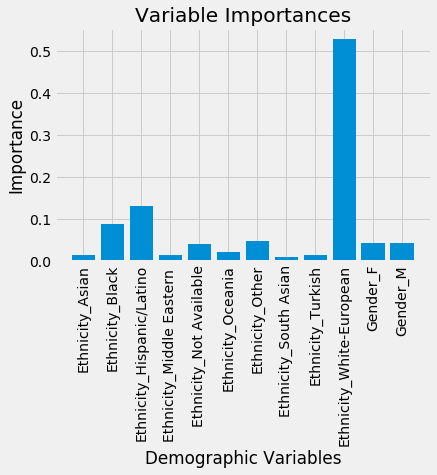

In [181]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Demographic Variables'); plt.title('Variable Importances');

The random forest test shows that gender and most ethnicities don't have a major impact on the questionnaire scores. However, White Europeans have the highest impact on scoring at 51%. As such, this suggest White Europeans are more likely to show symptoms of ASD.

## Classification for Predicting Probability of ASD

### Naive Bayes

Naive Bayes (NB) is a classifier that determines the likelihood of an event occurring. For this project, the NB will determine the probability that an autstic individual belongs to a specific demographic. Multinomial NB is used for ethnicity (allows multiple variables) while Bernoulli NB is used for gender (works best for binary variables).  

In [657]:
from sklearn.model_selection import train_test_split
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from six.moves import range
from matplotlib.colors import ListedColormap
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [658]:
# Test classifier
x = autism_data["Ethnicity code"]
x = x.values.reshape(-1,1)
y = (autism_data.ASD == 'YES').values.astype(np.int)
x_training, x_testing, y_training, y_testing = train_test_split(x,y)
clf = MultinomialNB().fit(x_training, y_training)
print("The training accuracy score is {:0.2f}".format(clf.score(x_training,y_training)))
print("The testing accuracy score is {:0.2f}".format(clf.score(x_testing,y_testing)))

The training accuracy score is 0.73
The testing accuracy score is 0.73


In [654]:
autism_data.groupby(by=['Ethnicity code','Ethnicity'])['Ethnicity'].count()

Ethnicity code  Ethnicity      
1               White-European     233
2               Hispanic/Latino     33
3               Not Available       96
4               Other               30
5               Black               43
6               Asian              123
7               Middle Eastern      92
8               Oceania             12
9               South Asian         36
10              Turkish              6
Name: Ethnicity, dtype: int64

In [726]:
# Create Pandas column of ethnicities
ethnic_names = list(autism_data['Ethnicity'].unique())
df1 = pd.DataFrame(ethnic_names)

In [738]:
# Create Pandas column of ethnicities comprising the ASD population
percentage_of_ASD_w_ethnicity = []
for i in range(1,11):
    percentage_of_ASD_w_ethnicity.append(100*np.mean(x_testing==i))
df2 = pd.DataFrame(percentage_of_ASD_with_ethnicity)

In [728]:
# Create Pandas column of proportions of ethnicies with ASD
Ethnicity_pop = []
for i in autism_data.groupby(by=['Ethnicity code','Ethnicity'])['Ethnicity'].count():
    Ethnicity_pop.append(i)
ethnicity_numpy = np.array(Ethnicity_pop,dtype=np.float)
percentage_numpy = np.array(percentage_of_ASD_with_ethnicity,dtype=np.float)
percentage_of_ethnicity_with_ASD = []
ddd = (189*percentage_numpy)/ethnicity_numpy
for i in ddd:
    percentage_of_ethnicity_with_ASD.append(i)
df3 = pd.DataFrame(percentage_of_ethnicity_with_ASD)

In [729]:
# Create main data frame
result = pd.concat([df1,df2,df3],axis=1)
new_title = ['Ethnicity', 'Proportion of Autistics Comprised of Ethnic Group', 'Proportion of Ethnic Group with Autism']
result.columns = new_title
result

,Ethnicity,Proportion of Autistics Comprised of Ethnic Group,Proportion of Ethnic Group with Autism
0,White-European,33.522727,27.192255
1,Hispanic/Latino,7.954545,45.557851
2,Not Available,11.931818,23.490767
3,Other,2.272727,14.318182
4,Black,5.681818,24.973573
5,Asian,21.590909,33.176275
6,Middle Eastern,12.500000,25.679348
7,Oceania,0.568182,8.948864
8,South Asian,3.977273,20.880682
9,Turkish,0.000000,0.000000


The percentage of autistics who are White-European is 33.52%. The percentage of White-European who are autistics is 27.19%.

The percentage of autistics who are Hispanic/Latino is 7.958%. The percentage of Hispanic/Latino who are autistics is 45.55%.

The percentage of autistics who are Not Available is 11.93%. The percentage of Not Available who are autistics is 23.49%.

The percentage of autistics who are Other is 2.27%. The percentage of Other who are autistics is 14.32%.

The percentage of autistics who are Black is 5.68%. The percentage of Black who are autistics is 24.97%.

The percentage of autistics who are Asian is 21.59%. The percentage of Asian who are autistics is 33.18%.

The percentage of autistics who are Middle Eastern is 12.5%. The percentage of Middle Eastern who are autistics is 25.68%.

The percentage of autistics who are Oceania is 0.57%. The percentage of Oceania who are autistics is 8.95%.

The percentage of autistics who are South Asian is 3.98%. The percentage of South Asian who are autistics is 20.88%.

The percentage of autistics who are Turkish is 0.00%. The percentage of Turkish who are autistics is 0.00%.

In [908]:
# Gender, BernoulliNB
whole_set = pd.get_dummies(autism_data)
x = whole_set[['Gender_F']]
x = x.values.reshape(-1,1)
y = (autism_data.ASD == 'YES').values.astype(np.int)
x_training, x_testing, y_training, y_testing = train_test_split(x,y)
clf = BernoulliNB().fit(x_training, y_training)
ASD_who_are_female = np.mean(x_testing==1)*100
ASD_who_are_male = np.mean(x_testing==0)*100
proportion_of_women_with_ASD = ASD_who_are_female*189/337 
proportion_of_men_with_ASD = ASD_who_are_male*189/367

print("The training accuracy score is {:0.2f}".format(clf.score(x_training,y_training)))
print("The testing accuracy score is {:0.2f}".format(clf.score(x_testing,y_testing)))
print("The percentage of autistics who are female is {:0.2f}%".format(ASD_who_are_female))
print("The percentage of autistics who are male is {:0.2f}%".format(ASD_who_are_male))
print("The percentage of women who are autistic is {:0.2f}%".format(proportion_of_women_with_ASD))
print("The percentage of men who are autistic is {:0.2f}%".format(proportion_of_men_with_ASD))

The training accuracy score is 0.75
The testing accuracy score is 0.69
The percentage of autistics who are female is 48.30%
The percentage of autistics who are male is 51.70%
The percentage of women who are autistic is 27.09%
The percentage of men who are autistic is 26.63%


The two Naive Bayes models offer some interesting insights into the percentage composition. The Multinomial NB showed that autistics are most likely to be of either Asian or White-European ethnicity. However, Hispanic/Latinos and Asians are the ethnicities with larger percentages of autistics. Interstingly, the Bernoulli NB showed that the percentage of autistics who are female is lower than the percentage of autistics who are male. This shows that White-Europeans are the most likely to be diagnosed with ASD. 